# Linear Regression and Coulomb's Law

**What is Coulomb's Law?**

Coulomb's law relates the force between two point charges.

$$ F = k \frac{q_1 q_2}{r^2} $$

where $F$ is the force (N), $q_1$ and $q_2$ are the magnitudes of the charges (C), $r$ is the distance between the charges (m),  $k$ is Coulomb's constant (~8.98 x 10^9 Nm^2/C^2).

How was it discovered?

**The aim of the notebook**

In this notebook, we are going to explore how data science can help us to more rigorously understand physical phenomena by using synthetic data with predefined noise parameters. This can help us test the robustness of our models without needing to collect experimental data as well as be able to better explain the predictions our models make in the real world.


## Simulating Data

Firstly, we're going to explore how we can use existing libraries to generate synthetic data. This is an easy way to explore how our models behave under uncertainty in our input data. In other words, we can generate synthetic data to model uncertainty that might arise in experiments and build our models in a way that is robust. We can also use this technique to get a better understanding of the laws we are simulating, particularly when exploring well known physical concepts (such as Coulomb's law).

The function `random_y_kx` will generate a tuple of numbers `x` and `y` with stochastic linear dependence of `y` on `x`. We're going to use this to model the force-distance relationship in Coulomb's law. We'll generate these samples from two normal distributions with respective mean and standard deviation and we're going to add a noise parameter to reflect the uncertainty in real world measurements.

In [2]:
import numpy as np

def random_y_kx(mean_x=0, sigma_x=1, mean_noise=0, sigma_noise=1, size=1):
    x = np.random.normal(mean_x, sigma_x, size)
    k = np.random.random()
    noise = np.random.normal(mean_noise, sigma_noise, size)
    y = k * x + noise
    return x, y

Now we're going to generate our first synthetic dataset.

In [8]:
data = []
for i in range(50):
    data.append(random_y_kx(sigma_noise=0.2))
    
x = []
y = []
for i in data:
    x.append(i[0][0])
    y.append(i[1][0])

In [9]:
import matplotlib.pyplot as plt

def plot_xy(x, y, title=None, xlabel=None, ylabel=None):
    plt.plot(x, y, 'o')
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.show()

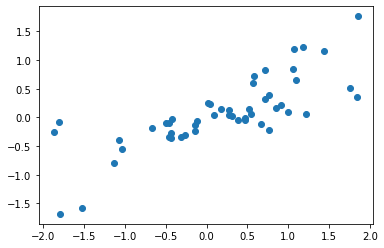

In [7]:
plot_xy(x, y)

We can take this one step further and model how our synthetic dataset changes when our noise is sampled from a different normal distribution.

In [10]:
def plot_sample(num_points=50, mean_noise=0, sigma_noise=1, size=1):
    data = []
    for i in range(num_points):
        data.append(random_y_kx(mean_noise=mean_noise, sigma_noise=sigma_noise, size=size)) 
    _x = []
    _y = []
    for i in data:
        _x.append(i[0][0])
        _y.append(i[1][0])

    plot_xy(_x, _y)

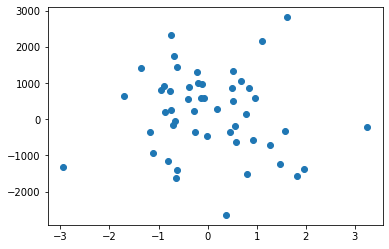

In [35]:
plot_sample(sigma_noise=1000)

Comment on the plot

## Modelling with Simulated Data

Describe the model we're going to use

In [19]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

model.fit(x_arr.reshape(-1, 1), y_arr.reshape(-1, 1))

LinearRegression()

In [38]:
r_sq = model.score(x_arr.reshape(-1, 1), y_arr.reshape(-1, 1))
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7240018728751738
intercept: [0.03469459]
slope: [[0.4505338]]


Comment on results

## Modelling with Real Data

Apply same model on real data

Comment on results